In [1]:
import numpy as np

## Importing MNIST dataset

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


In [3]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

In [4]:
y[11]

'5'

In [5]:
some_digit = X[11]

## Visualization

(-0.5, 27.5, 27.5, -0.5)

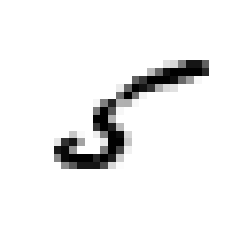

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

some_digit_img = some_digit.reshape(-1, 28)

plt.imshow(some_digit_img, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [7]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

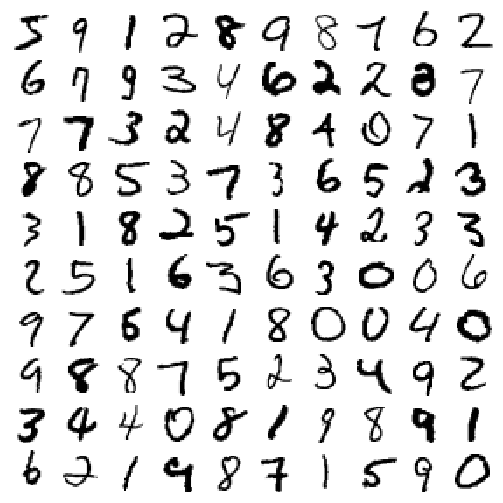

In [8]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [9]:
# Converting dtype
y = y.astype(int)

In [10]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Shuffling indexes

In [12]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X[shuffle_index], y[shuffle_index]

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9675 , 0.96615, 0.96675])

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([False, False, False, ..., False, False, False])

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_train_5, y_train_pred)

array([[53799,   780],
       [ 1212,  4209]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_train_5, y_train_pred))

              precision    recall  f1-score   support

       False       0.98      0.99      0.98     54579
        True       0.84      0.78      0.81      5421

    accuracy                           0.97     60000
   macro avg       0.91      0.88      0.90     60000
weighted avg       0.97      0.97      0.97     60000



In [20]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
recall_score(y_train_5, y_train_pred)

0.8436560432952496


0.7764250138350858

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([7828.23971358])

In [22]:
threshold = 6000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

### Choosing the threshold

In [23]:
# Getting the decision function for each sample

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([ -3817.46708176, -16002.28318909,  -9879.69942836, ...,
       -12923.73278833, -22308.67646073, -21914.80194415])

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    plt.xlim([-90000, 45000])
    plt.grid()

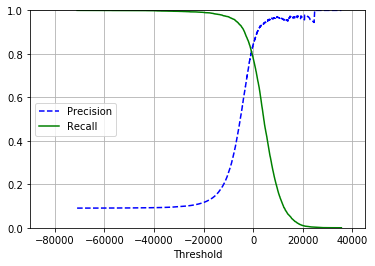

In [25]:
plot_precision_recall_threshold(precisions, recalls, thresholds)

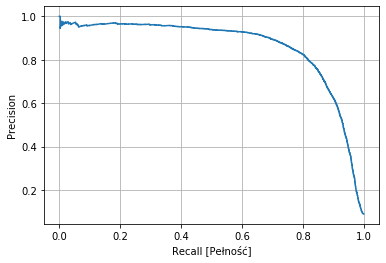

In [26]:
plt.plot(recalls, precisions)
plt.xlabel('Recall [Pełność]')
plt.ylabel('Precision')
plt.grid()

In [27]:
# 10000

y_train_pred_90 = (y_scores > 10000)
print(classification_report(y_train_5, y_train_pred_90))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96     54579
        True       0.97      0.17      0.28      5421

    accuracy                           0.92     60000
   macro avg       0.95      0.58      0.62     60000
weighted avg       0.93      0.92      0.90     60000



In [28]:
precision_score(y_train_5, y_train_pred_90)

0.9678800856531049

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [30]:
def plot_roc_curve(fpr, tpr, thresholds, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

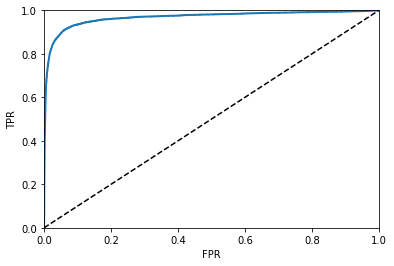

In [31]:
plot_roc_curve(fpr, tpr, thresholds)

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.967245315071402

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method='predict_proba')
y_probas_forest

array([[0.97, 0.03],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.99, 0.01]])

In [34]:
y_scores_forest = y_probas_forest[:, 1] # probabilities for the positive class

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_5, y_scores_forest)

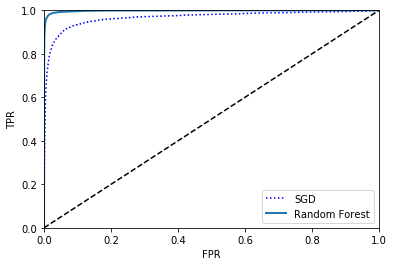

In [35]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_rf, tpr_rf, thresholds_rf, 'Random Forest')
plt.legend(loc='lower right')

In [36]:
roc_auc_score(y_train_5, y_scores_forest)

0.9982452473767618

In [37]:
# All classes

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5])

In [38]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-36421.61726783, -17462.73616314,  -3312.03173618,
        -10697.87165226,  -1599.34171261,   3378.33816135,
        -16541.27256564, -19383.34515267,   -155.37723731,
         -9114.04346569]])

In [39]:
idx = np.argmax(some_digit_scores)
idx

5

In [40]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
sgd_clf.classes_[idx]

5

In [42]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5])

In [43]:
ovo_clf.estimators_

(SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
               power_t=0.5, random_state=42, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
               power_t=0.5, random_state=42, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,

In [44]:
len(ovo_clf.estimators_)

45

In [45]:
rf_clf.fit(X_train, y_train)
rf_clf.predict([some_digit])

array([5])

In [46]:
rf_clf.predict_proba([some_digit])

array([[0.  , 0.02, 0.02, 0.  , 0.  , 0.92, 0.  , 0.01, 0.03, 0.  ]])

In [47]:
cross_val_score(rf_clf, X_train, y_train, cv=3)

array([0.96515, 0.968  , 0.96225])

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train, y_train)
cross_val_score(rf_clf, X_train_scaled, y_train, cv=3)

array([0.96515, 0.96795, 0.9622 ])

In [49]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\JTKubi\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5596,    0,   16,    8,    9,   41,   35,    6,  211,    1],
       [   1, 6423,   42,   22,    4,   41,    5,    7,  184,   13],
       [  26,   28, 5261,   89,   68,   19,   68,   40,  347,   12],
       [  27,   24,  118, 5253,    2,  208,   25,   44,  366,   64],
       [  11,   15,   46,    8, 5233,    9,   37,   24,  302,  157],
       [  24,   16,   31,  164,   49, 4488,   82,   19,  484,   64],
       [  30,   16,   44,    3,   43,   91, 5562,    5,  124,    0],
       [  19,   13,   50,   24,   48,   11,    3, 5729,  156,  212],
       [  17,   65,   43,  101,    3,  124,   33,    8, 5412,   45],
       [  24,   24,   30,   59,  122,   42,    1,  178,  319, 5150]],
      dtype=int64)

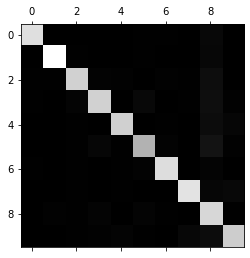

In [50]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [51]:
# Sum of each row

row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [52]:
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

array([[9.44791491e-01, 0.00000000e+00, 2.70133378e-03, 1.35066689e-03,
        1.51950025e-03, 6.92216782e-03, 5.90916765e-03, 1.01300017e-03,
        3.56238393e-02, 1.68833361e-04],
       [1.48323939e-04, 9.52684663e-01, 6.22960546e-03, 3.26312667e-03,
        5.93295758e-04, 6.08128152e-03, 7.41619697e-04, 1.03826758e-03,
        2.72916049e-02, 1.92821121e-03],
       [4.36388050e-03, 4.69956361e-03, 8.83014434e-01, 1.49378986e-02,
        1.14132259e-02, 3.18898959e-03, 1.14132259e-02, 6.71366230e-03,
        5.82410205e-02, 2.01409869e-03],
       [4.40384929e-03, 3.91453270e-03, 1.92464525e-02, 8.56793345e-01,
        3.26211059e-04, 3.39259501e-02, 4.07763823e-03, 7.17664329e-03,
        5.96966237e-02, 1.04387539e-02],
       [1.88291681e-03, 2.56761383e-03, 7.87401575e-03, 1.36939404e-03,
        8.95754878e-01, 1.54056830e-03, 6.33344745e-03, 4.10818213e-03,
        5.16946251e-02, 2.68743581e-02],
       [4.42722745e-03, 2.95148497e-03, 5.71850212e-03, 3.02527209e-02,
   

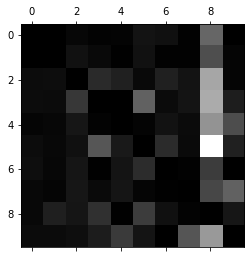

In [53]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

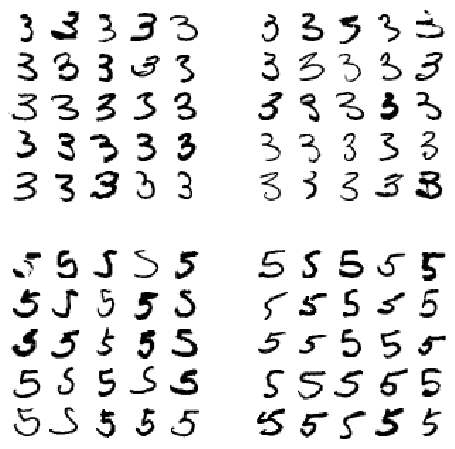

In [54]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

### Multilabel classification

In [55]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [False, False]])

In [56]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
knn_clf.predict([some_digit]) # some_digit = 5

array([[False,  True]])

In [58]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
y_train_knn_pred

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [False, False]])

In [59]:
from sklearn.metrics import f1_score

f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.9773322193062133